In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from math import *

#  Reading the different text file

filename = ['diffusion.infile','helmholtz.infile', 'conv_diff.infile']
file = open(filename[0],'r').readlines() 

#for line in file:
#    print(line)

''' Defining the different variables of the ODE '''

epsilon = float(file[0])
beta = lambda x: eval(file[1])
sigma = lambda x: eval(file[2])
f = lambda x: eval(file[3])
a = float(file[4])
b = float(file[5])
u = lambda x: eval(file[6])   #Exact Solution which is given
N = int(file[7])
Nlev = int(file[8])

max_error = np.zeros(Nlev,dtype='float64')
H = np.zeros(Nlev,dtype='float64')
e_l2 = np.zeros(Nlev,dtype='float64')
eoc_max_e = []
eoc_l2 = []

'''Need to build the matrix A'''

for k in range(Nlev):
       
    h=float(1/((2**k)*N))
    X = np.linspace(0,1,(2**k)*N+1)
    #print(len(X))
    
    
    alpha = lambda x: (-2*epsilon-(beta(x)*h))/(2*h**2) #((epsilon/h**2) - (beta(x)/2*h))
    eta = lambda x: (2*epsilon+((h**2)*sigma(x)))/(h**2) #(sigma(x) - (2*epsilon/h**2) )
    gamma = lambda x: (-2*epsilon+(h*beta(x)))/(2*h**2) #((epsilon/h**2) + (beta(x)/2*h))
                                         
    A = np.zeros(((2**k)*N+1,(2**k)*N+1),dtype = 'float64')
    
    
    A[0,0] = 1
    A[(2**k)*N,(2**k)*N] = 1
    
    for i in range(1,(2**k)*N):
        A[i,i-1] = alpha(X[i])
        A[i,i] = eta(X[i])
        A[i,i+1] = gamma(X[i])
    #print(A)
    
    F = np.zeros((2**k)*N+1,dtype = 'float64')
    F[0] = a
    F[((2**k)*N)] = b
    
      
    for i in range(1,(2**k)*N): 
        F[i] = f(X[i])
    #print(F)
    U = np.linalg.solve(A,F)
    np.set_printoptions(precision=3)
    print('Approximation of u(x) with %s points: %s'%(2**k*N,U))
    print('')
    print('')
    

    ''' Now we are going to compute the errors in approximation and exact solution '''

    error = [(abs(U[i]-u(X[i]))) for i in range(1,2**k*N-1)]
    
    sum=0
    for i in range(len(error)):
        sum += (error[i])**2
    #print((h*sum)**0.5)
    
    e_l2[k] = (h*sum)**0.5
        
    max_error[k] = max(error)
    H[k]=h
     
for i in range(len(max_error)):
    if i==0:
        eoc_max_e.append('N/A')
        eoc_l2.append('N/A')
    else: 
        eoc_max_e.append(log(max_error[i-1]/max_error[i])/log(2))
        eoc_l2.append(log(e_l2[i-1]/e_l2[i])/log(2))


Approximation of u(x) with 10 points: [-2.132e-16  4.500e-02  8.000e-02  1.050e-01  1.200e-01  1.250e-01
  1.200e-01  1.050e-01  8.000e-02  4.500e-02  0.000e+00]


Approximation of u(x) with 20 points: [-1.457e-15  2.375e-02  4.500e-02  6.375e-02  8.000e-02  9.375e-02
  1.050e-01  1.137e-01  1.200e-01  1.237e-01  1.250e-01  1.237e-01
  1.200e-01  1.137e-01  1.050e-01  9.375e-02  8.000e-02  6.375e-02
  4.500e-02  2.375e-02  0.000e+00]


Approximation of u(x) with 40 points: [-2.540e-15  1.219e-02  2.375e-02  3.469e-02  4.500e-02  5.469e-02
  6.375e-02  7.219e-02  8.000e-02  8.719e-02  9.375e-02  9.969e-02
  1.050e-01  1.097e-01  1.137e-01  1.172e-01  1.200e-01  1.222e-01
  1.237e-01  1.247e-01  1.250e-01  1.247e-01  1.237e-01  1.222e-01
  1.200e-01  1.172e-01  1.137e-01  1.097e-01  1.050e-01  9.969e-02
  9.375e-02  8.719e-02  8.000e-02  7.219e-02  6.375e-02  5.469e-02
  4.500e-02  3.469e-02  2.375e-02  1.219e-02  0.000e+00]


Approximation of u(x) with 80 points: [-1.047e-14  6.172e-03 

In [58]:
''' Table shows the different errors associated with our calculations'''

table = pd.DataFrame({'$h$': H, 
                    '$e_{l2}$': e_l2,
                    '$eoc_{e_{l2}}$': eoc_l2,
                    '$e_{max}$': max_error,
                    '$eoc_{e_{max}}$': eoc_max_e})

table = table.reindex_axis(['$h$','$e_{l2}$','$eoc_{e_{l2}}$','$e_{max}$','$eoc_{e_{max}}$'], axis=1)
display(table)

,$h$,$e_{l2}$,$eoc_{e_{l2}}$,$e_{max}$,$eoc_{e_{max}}$
0,0.1000,9.176671e-17,N/A,1.734723e-16,N/A
1,0.0500,8.083901e-16,-3.13901,1.380840e-15,-2.99277
2,0.0250,1.519245e-15,-0.910231,2.489328e-15,-0.85021
3,0.0125,6.100087e-15,-2.00548,1.034416e-14,-2.05499


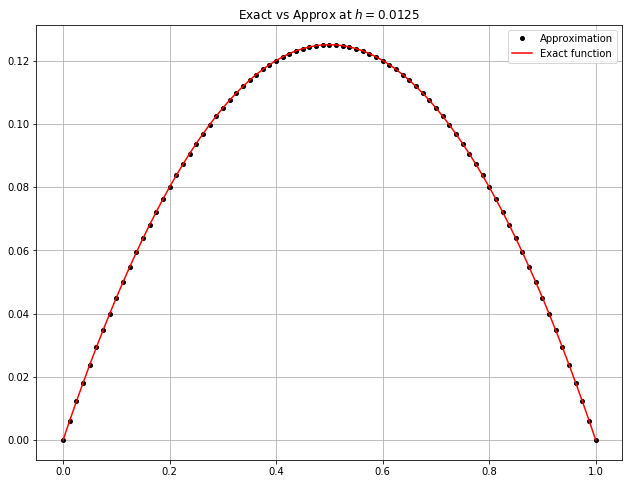

In [59]:
plt.plot(X,U, 'k.', markersize = 8, label = 'Approximation');
plt.plot(X,[u(X[i]) for i in range(len(X))],'r-',label = 'Exact function');
plt.legend(); 
plt.title('Exact vs Approx at $h=%0.6s$' %(h));
plt.grid(True)
plt.gcf().set_size_inches(10.5, 8)